In [ ]:
#Problem Statement
"""
We have a huge number of comments from Youtube for a trailer from a worldwide
production house, you as an AI serivice provider are supposed to analyse all the
comments on that trailer, get the sentiment and the score, and give a consolidated
report for the trailer about how it might perform on the box office.

"""

In [ ]:
#Libraries
"""
PyTorch - torch
HuggingFace - transformers
NLTK - nltk
VADER - sentiment.vader

"""

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install transformers

In [ ]:
!pip install nltk

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_excel("/content/John Wick Comments.xlsx")
df


,Comments
0,"Ana sucks as a killer, doesnt seem realistic. ..."
1,The music in this trailer gave me chills!
2,Ana and Keanu ... the best power couple ever!!!!!
3,This is gold
4,LoL John Chick...🤣
...,...
95,💯
96,Really black woman lecturing about slavic myth...
97,"Hunting is not for women, they are not made fo..."
98,I think eve and John will team up and this is ...


In [ ]:
comments = []
comments = df['Comments'].tolist()

In [ ]:
for comment in comments:
  print(comment)
  print("===")

Ana sucks as a killer, doesnt seem realistic. And she&#39;s boring. PASS!
===
The music in this trailer gave me chills!
===
Ana and Keanu ... the best power couple ever!!!!!
===
This is gold
===
LoL John Chick...🤣
===
Your videos are always so helpful, thank you!
===
Thats how u create a female led movie...take notes everyone specially SONY
===
Should have been a stand alone movie on Donnie yen’s character
===
Yeah, this is a must watch. LFG
===
The music in this trailer gave me chills!
===
❤❤❤
===
Please be good film, please be a good film, please be great....
===
Soon am releasing a f*n trailer of johnwick &quot;scamagas&quot;&quot;...m sure lionsgate will pay me 10$m for the concept
===
Did she just shoot at John Wick?? Well, oh snap.
===
I can&#39;t wait... to see another shopping montage!
===
Even movies have DLCs now.
===
Good trailer 3.3 star vs good movie 3.7 star😮
===
Keanu : stop knocking my door.. i need one more round 😊
===
The music in this trailer gave me chills!
===
Supe

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
"""
What are stopwords?
Words that help make up a sentence but do not have their own meaning
it, they, them, what, am, I
"""
comment_score = sia.polarity_scores("I am very happy with this movie.")
print(comment_score)

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6115}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#for classifying my comments into positive and negative, i used an AI model from HuggingFace to get the score of the sentence, we will go with nltk/vader sentiment

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
sentence = "Today is a very sunny day, I would like to go out and play football with my friends"
tokenized_comment = word_tokenize(sentence)
print("Tokenized Comment: ",tokenized_comment)

processed_comment = [ word for word in tokenized_comment if word.lower() not in stop_words]
print("Processed Comment: ",processed_comment)

Tokenized Comment:  ['Today', 'is', 'a', 'very', 'sunny', 'day', ',', 'I', 'would', 'like', 'to', 'go', 'out', 'and', 'play', 'football', 'with', 'my', 'friends']
Processed Comment:  ['Today', 'sunny', 'day', ',', 'would', 'like', 'go', 'play', 'football', 'friends']


In [ ]:
def remove_stopwords(raw_comment):
  tokenized_comment = word_tokenize(sentence)
  processed_comment = [ word for word in tokenized_comment if word.lower() not in stop_words]
  return ' '.join(processed_comment)

In [ ]:
result = remove_stopwords("Today is a very sunny day, I would like to go out and play football with my friends")
print(result)

Today sunny day , would like go play football friends


In [2]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from transformers import pipeline

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))
classifier = pipeline("sentiment-analysis", model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [6]:
import pandas as pd
df = pd.read_excel("/content/John Wick Comments.xlsx")

In [7]:
comments = []
comments = df['Comments'].tolist()

In [8]:
def remove_stopwords(raw_comment):
  tokenized_comment = word_tokenize(raw_comment)
  processed_comment = [ word for word in tokenized_comment if word.lower() not in stop_words]
  return ' '.join(processed_comment)

In [9]:
def get_comment_sentiment_details(raw_comment):
  processed_comment = remove_stopwords(raw_comment)

  words = processed_comment.split()
  positive_words = ""
  negative_words = ""
  comment_sentiment = ""

  sentence_score_temp = sia.polarity_scores(processed_comment)
  abs_sentence_score = abs(sentence_score_temp['compound'])
  sentiment_label = classifier(processed_comment)
  comment_sentiment = sentiment_label[0]['label']

  if abs_sentence_score == 0:
    comment_sentiment = "NEUTRAL"

  if comment_sentiment == "NEGATIVE":
    sentence_score = abs_sentence_score * -1
    for word in  words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment['compound'] < 0:
        negative_words += word + " "

  if comment_sentiment == "NEGATIVE":
    sentence_score = abs_sentence_score
    for word in  words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment['compound'] > 0:
        positive_words += word + " "
  else:
    sentence_score = abs_sentence_score

  return positive_words, negative_words, sentence_score, comment_sentiment

In [10]:
positive_words = ""
negative_words = ""
neu_count = 0

pos_values_list = []
neg_values_list = []
avg_pos_score = 0
avg_neg_score = 0

for comment in comments:
  pw, nw, ss, cs = get_comment_sentiment_details(comment)
  positive_words += pw+ " "
  negative_words += nw+ " "

  if cs == "NEGATIVE":
    neg_values_list.append(ss)
  elif cs == "POSITIVE":
    pos_values_list.append(ss)
  else:
    neu_count+=1

try:
  avg_pos_score = sum(pos_values_list) / len(pos_values_list)
  avg_neg_score = sum(neg_values_list) / len(neg_values_list)
except ZeroDivisionError:
  if len(pos_values_list) == 0 or len(neg_values_list) == 0:
    avg_pos_score = 0
    avg_neg_score = 0

final_score = (avg_pos_score + avg_neg_score) / (len(pos_values_list) + len(neg_values_list))
print(final_score)

0.020104661558109832


In [11]:
positive_words

'    LoL   create       sure  Well                   joke             hand     God        xD       enthusiastically Party giving opportunity well truth kind treat treat excellent alive engaged superiors alive           Yes  lol   Yeah            like   Allow              innocent innocent want win strength advantage  '

In [12]:
negative_words

'sucks killer boring             pay  shoot     stop                  villain                  damn          threatening threatening threats stab shoot threats stop fear exposing forced trivial brutal cut scream cruelly accusing charges       Sorry fights      killer fail  dead death  kill               fuck     missing    Badass   destruction    dangerous suspect dangerous fights manipulation killer  '

In [13]:
avg_pos_score

0.6242517241379311

In [14]:
avg_pos_score

0.6242517241379311

In [ ]:
!pip install wordcloud

positives


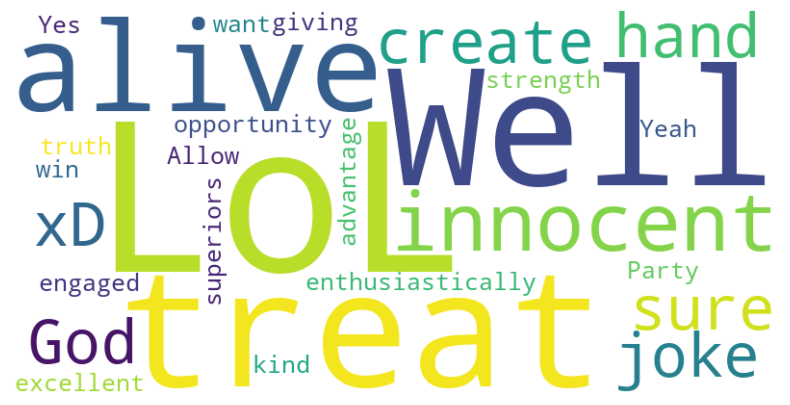

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("positives")
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

negatives


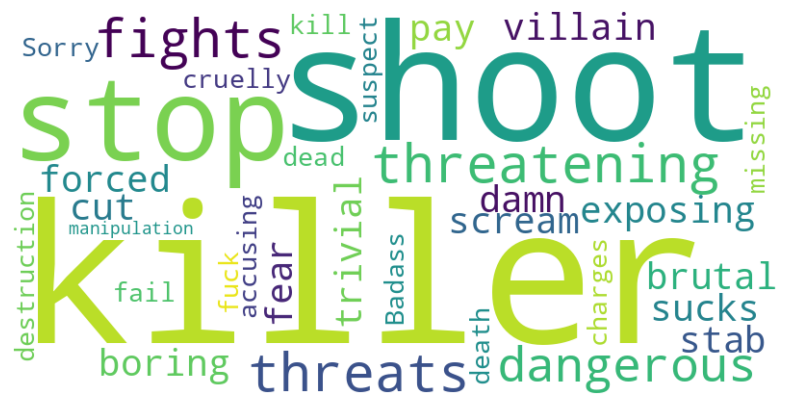

In [16]:
print("negatives")
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
final_score = (avg_pos_score + avg_neg_score) / (len(pos_values_list) + len(neg_values_list))
print(final_score)

0.020104661558109832


In [18]:
if final_score >= 0.5:
    verdict = "Hit"
elif final_score >= 0.2:
    verdict = "Average"
else:
    verdict = "Flop"

print(f"Verdict: {verdict}")

Verdict: Flop


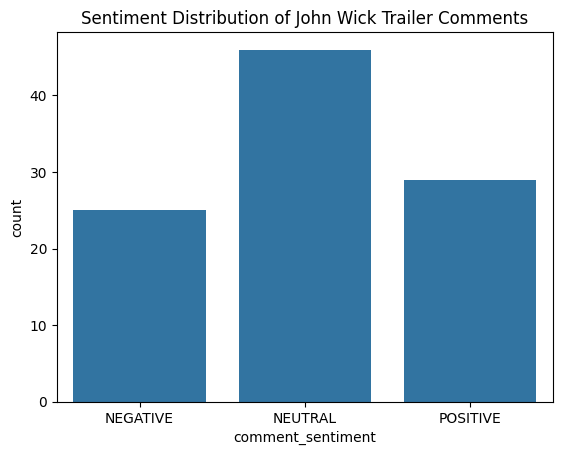

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df['comment_sentiment'] = df['Comments'].apply(lambda comment: get_comment_sentiment_details(comment)[3])

sns.countplot(x='comment_sentiment', data=df)
plt.title('Sentiment Distribution of John Wick Trailer Comments')
plt.show()